In [1]:
import pandas as pd
import tensorflow as tf
import keras
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('YESBANK.csv',usecols=['Open','High','Low','Close','Volume'])
train=df.head(400)
test=df.tail(89)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 400 to 488
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    88 non-null     float64
 1   High    88 non-null     float64
 2   Low     88 non-null     float64
 3   Close   88 non-null     float64
 4   Volume  88 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


In [3]:
train

,Open,High,Low,Close,Volume
0,334.0,338.500000,328.000000,333.899994,470267.0
1,336.0,343.750000,331.250000,342.500000,653618.0
2,350.0,356.500000,333.100006,340.250000,2419109.0
3,348.0,352.000000,339.250000,348.299988,1659646.0
4,349.0,358.000000,349.000000,355.250000,663569.0
...,...,...,...,...,...
395,65.0,65.199997,58.049999,59.500000,14885233.0
396,59.0,59.299999,55.000000,57.349998,19171338.0
397,58.0,60.900002,55.549999,59.500000,19148813.0
398,59.5,62.250000,57.650002,58.799999,12946414.0


In [4]:
label_train=train.pop('Close')
label_test=test.pop('Close')

In [5]:
label_train

0      333.899994
1      342.500000
2      340.250000
3      348.299988
4      355.250000
          ...    
395     59.500000
396     57.349998
397     59.500000
398     58.799999
399     59.450001
Name: Close, Length: 400, dtype: float64

In [6]:
train_stats=train.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
Open,400.0,2.453318e+02,9.472542e+01,56.299999,178.412502,2.382750e+02,3.333375e+02,3.974500e+02
High,400.0,2.498312e+02,9.525151e+01,59.299999,181.787506,2.462000e+02,3.379125e+02,4.040000e+02
Low,400.0,2.393314e+02,9.443892e+01,53.150002,171.337502,2.329500e+02,3.299125e+02,3.927000e+02
Volume,400.0,4.108042e+06,4.388718e+06,211556.000000,771410.500000,2.821196e+06,5.674854e+06,2.579198e+07


In [7]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
train=norm(train)
test=norm(test)

In [8]:
def build_model():
  
  #sigmoid
  #relu-rectified linear unit


  model=Sequential([
                         keras.layers.Dense(64,activation='relu',input_shape=[len(train.keys())]),
                         keras.layers.Dense(64,activation='relu'),
                         keras.layers.Dense(1)
  ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)  #RMSprop 
  model.compile(loss='mse',optimizer=optimizer,metrics=['mse','mae'])
  
  return model



In [9]:
model=build_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [11]:
obj=model.fit(
    train,label_train,epochs=10,validation_split=0.4,
)

Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 93255.9453 - mse: 93255.9453 - mae: 297.3993 - val_loss: 30809.1250 - val_mse: 30809.1250 - val_mae: 162.3454
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 92714.9766 - mse: 92714.9766 - mae: 296.5499 - val_loss: 30623.2598 - val_mse: 30623.2598 - val_mae: 161.6139
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 92171.7891 - mse: 92171.7891 - mae: 295.6946 - val_loss: 30399.9219 - val_mse: 30399.9219 - val_mae: 160.7282
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 91573.9141 - mse: 91573.9141 - mae: 294.7407 - val_loss: 30129.6621 - val_mse: 30129.6621 - val_mae: 159.6413
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 90862.5547 - mse: 90862.5547 - mae: 293.6036 - val_loss: 29806.2500 - val_mse: 29806.2500 - val_mae: 158.3374
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 89993.7422 - mse: 89993.7422 

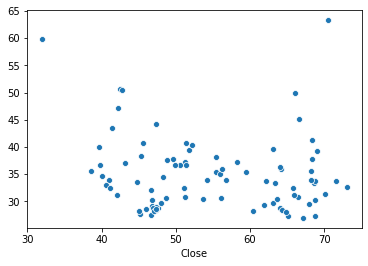

In [12]:
test_predictions= model.predict(test).flatten()

sns.scatterplot(label_test,test_predictions)

In [13]:
test_predictions

array([29.39704 , 28.305233, 29.70388 , 33.74158 , 29.563684, 33.454544,
       26.955334, 27.328016, 28.738953, 33.961212, 38.149166, 35.35934 ,
       30.541504, 30.361244, 32.51153 , 37.62358 , 43.493996, 59.78089 ,
       50.601208, 47.25449 , 40.691864, 37.116516, 33.87306 , 40.057037,
       34.738686, 32.948013, 32.47511 , 44.200924, 40.786064, 39.36667 ,
       37.256966, 34.44162 , 40.435196,       nan, 37.197037, 33.902557,
       63.29755 , 45.19217 , 50.00143 , 37.719322, 33.65449 , 30.866213,
       39.228096, 32.690117, 35.56397 , 30.314556, 27.271626, 31.221296,
       35.98253 , 32.51911 , 28.47357 , 27.98981 , 30.44498 , 33.349064,
       33.970833, 31.31995 , 41.25096 , 36.35713 , 35.374218, 39.715652,
       33.761513, 34.97998 , 36.000008, 36.603485, 50.497444, 38.36283 ,
       32.063896, 30.2429  , 28.765583, 29.09685 , 36.596283, 36.6391  ,
       37.793686, 30.849037, 30.656227, 29.635784, 28.962076, 28.825327,
       27.570229, 28.43608 , 28.157   , 27.698849, 

In [15]:
pd.DataFrame(test_predictions[0:100],label_test[0:100])


,0
Close,
61.900002,29.397039
60.400002,28.305233
63.099998,29.703880
71.599998,33.741581
67.949997,29.563684
...,...
47.299999,28.643539
44.799999,33.525043
42.099998,31.259600


In [16]:

#Making a new prediction
import numpy as np

new=pd.DataFrame(np.array([334,310,350,986887])) #new data for prediction

train_stats=new.describe().T

#send data to norm function
new=norm(new).to_numpy().reshape(-1,4)


model.predict(new)

array([[12.335249]], dtype=float32)